In [ ]:
#knn classifier
# as is work as alise
#scikit learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline


In [ ]:
data = pd.read_csv('iris.data')

In [ ]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,classlabel\t
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,sepallength,sepalwidth,petallength,petalwidth,classlabel\t
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data['classlabel\t'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: classlabel\t, dtype: int64

In [ ]:
data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'classlabel\t'],
      dtype='object')

In [ ]:
data.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   classlabel	  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe(include='all')

,sepallength,sepalwidth,petallength,petalwidth,classlabel\t
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
X = data.iloc[:,0:4]   
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = data.iloc[:,-1]     
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: classlabel\t, dtype: object

In [ ]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
y_test.shape

(38,)

In [ ]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1 = knnmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, y_predict1)
acc

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,y_predict1)
cm


array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

In [ ]:
cm1 = pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,16,0
virginica,0,0,9


In [ ]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [ ]:
prediction_output

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
y_test,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-setosa
y_predict1,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-setosa


In [ ]:
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [ ]:
prediction_output.iloc[0,:].value_counts()

Iris-versicolor    16
Iris-setosa        13
Iris-virginica      9
Name: y_test, dtype: int64

In [ ]:
Ks=21
mean_acc=np.zeros((Ks-1))

#train and predict
for n in range(1, Ks):
  neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
  yhat=neigh.predict(X_test)
  mean_acc[n-1]=accuracy_score(y_test,yhat)

In [ ]:
print(mean_acc)

[1.         1.         1.         1.         0.97368421 1.
 0.97368421 1.         1.         1.         1.         1.
 0.97368421 0.97368421 0.97368421 0.97368421 0.94736842 0.94736842
 0.94736842 0.97368421]


In [ ]:
print("Best Acccuracy was with" , mean_acc.max(), "with k=",  mean_acc.argmax()+1)

Best Acccuracy was with 1.0 with k= 1


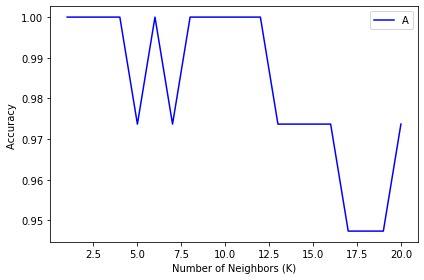

In [ ]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()